# 4B: Exploratory Data Analysis

## 🎯Learning Objectives:
1. Perform broad descriptive analysis to summarise the dataset.
2. Apply filters to focus the analysis on relevant subsets of data.

## ▶️: Load & Explore the Dataset  
We will get started by upload the Merged_Data.csv file.

In [2]:
import pandas as pd

import pandas as pd
from statsmodels.tools import categorical

df = pd.read_csv("../Lesson 3/merged_data.csv")
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 984 entries, 0 to 983
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Customer_ID       984 non-null    int64  
 1   Gender            984 non-null    object 
 2   Age               971 non-null    float64
 3   Occupation        984 non-null    object 
 4   Marital_Status    984 non-null    object 
 5   Food_Item         984 non-null    object 
 6   Category          984 non-null    object 
 7   Date_of_Visit     984 non-null    object 
 8   Time              984 non-null    object 
 9   Weather           984 non-null    object 
 10  Price             984 non-null    int64  
 11  Weekend           984 non-null    object 
 12  Public_Holiday    984 non-null    object 
 13  Year              984 non-null    int64  
 14  Month             984 non-null    int64  
 15  Day               984 non-null    int64  
 16  Day_of_Week       984 non-null    object 
 1

## 1️⃣Summarise Numerical Variables

### ✅ What We'll Do:
1. Select numerical data columns.
2. Use .describe() to print a statistical summary of the table.

In [3]:
# get summary numerical
numerical_summary = ((df.drop(columns=["Customer_ID","Category_Encoded"]) # drop helper column no need for summary
                  .select_dtypes(include='number')) # find numerical column only
                     .describe())

# display the result
print("Descriptive statistics for numerical variables: ")
print(numerical_summary)

Descriptive statistics for numerical variables: 
              Age       Price    Year       Month         Day  \
count  971.000000  984.000000   984.0  984.000000  984.000000   
mean    41.093718   12.720528  2023.0    2.238821   14.809959   
std     13.953031    4.763816     0.0    0.971034    8.998104   
min     19.000000    4.000000  2023.0    1.000000    1.000000   
25%     28.000000    9.000000  2023.0    1.000000    7.000000   
50%     41.000000   13.000000  2023.0    2.000000   14.000000   
75%     54.000000   16.000000  2023.0    3.000000   23.000000   
max     65.000000   23.000000  2023.0    4.000000   31.000000   

       Discounted_Price  
count        984.000000  
mean          11.885152  
std            4.282042  
min            4.060000  
25%            8.190000  
50%           11.880000  
75%           15.252500  
max           21.550000  


**Reflection question:** Look at the statistical summary generated by .describe(). What insights can you draw that relate to the "big questions" we are exploring?
- How does the count help you check for missing data?
    - shows how many non-missing values are in a column and if the count is less than the total rows, the there is missing

- What do the mean and 50% (median) tell you about the shape and center of the data?
    - mean = use it to understand overall level of data, quick summaries but will ignore outlier
    - median = best when your data has outlier


- How can the standard deviation (std) help you spot variability, range issues, or potential outliers?
    - to see the data consistency

## 2️⃣ Explore Categorical Variables
1. Select categorical data columns.
2. Use loop and value_counts() to print a statistical summary of the table.

In [4]:
# find categorical columns
categorical_columns = df.select_dtypes(include='object').columns

print("\nFrequency distribution for categorical variables:")
for col in categorical_columns:
    print(f"\nColumn: {col}")
    print(df[col].value_counts())


Frequency distribution for categorical variables:

Column: Gender
Gender
Male      544
Female    440
Name: count, dtype: int64

Column: Occupation
Occupation
Manager         295
Blue Collar     231
Student         184
Executive       157
White Collar    117
Name: count, dtype: int64

Column: Marital_Status
Marital_Status
Married    615
Single     369
Name: count, dtype: int64

Column: Food_Item
Food_Item
Smoothie     346
Ice Cream    336
Soup         112
Tea           95
Coffee        95
Name: count, dtype: int64

Column: Category
Category
Cold    682
Hot     302
Name: count, dtype: int64

Column: Date_of_Visit
Date_of_Visit
2023-03-23    19
2023-03-30    18
2023-02-28    17
2023-02-20    17
2023-02-10    17
              ..
2023-02-26     5
2023-02-06     5
2023-01-09     4
2023-04-10     4
2023-02-17     2
Name: count, Length: 100, dtype: int64

Column: Time
Time
11:00    61
19:00    56
20:30    50
21:30    49
17:30    48
16:30    42
22:30    42
20:00    41
13:30    41
14:30    40
1

**Reflection question:** After reviewing the .value_counts() output for the categorical columns, what patterns or insights do you notice about the distribution of categories?
- Are there categories that dominate the data?
- Are there rare or infrequent categories that stand out?
- What might the distribution tell you about biases, imbalances, or special cases in your dataset?


**answer**
1. Dominant categories (imbalanced features)
- Gender: Males (544) are more than females (440). Not extremely imbalanced, but still a tilt.
- Marital_Status: More married (615) than single (369).
- Weather: Strongly dominated by sunny (682) vs raining (302).
- Weekend: Majority of visits on weekdays (716), only 268 on weekends.
- Public_Holiday: Mostly No (799) vs Yes (185).
- Category: Cold items (682) are more popular than hot items (302).
- These suggest the dataset reflects “normal conditions” (weekday, non-holiday, sunny days, cold items), so models trained here might underrepresent the rarer cases.

2. Rare / infrequent categories
- Food_Item: Smoothies (346) and Ice Cream (336) dominate, while Soup (112), Tea (95), and Coffee (95) are much less frequent.
- Occupation: Manager (295) and Blue Collar (231) dominate, while White Collar (117) is relatively rare.
- Day_of_Week: Visits spread fairly evenly, but Saturday (119) is much lower compared to others (140+).
- Time: Certain times like 11:00, 19:00, and 20:30 have high counts, while early morning (10:00–10:30) or late night (22:00–22:30) are less common.
- Rare categories might be important for niche insights (e.g., coffee drinkers are a minority but could represent a distinct behavior segment).

3. Special cases / potential biases

- Dates (Date_of_Visit & Default_Date): Some dates have very few visits (as low as 2–5). This might reflect missing data, low-traffic days, or special events.
- Category vs Food_Item: Cold items dominate, possibly biased toward weather patterns (since sunny is also dominant).

## 3️⃣ Filter and summarise data

### (a) Filter for Exact Value

Sometimes, you want to focus on rows where a specific column matches an exact value. We use the == operator to filter for an exact match.

In this example, we'll filter the dataset to find all rows where the food item is "ice cream."

In [5]:
icecream_df = df[df['Food_Item'] == 'Ice Cream']
icecream_df.head()

,Customer_ID,Gender,Age,Occupation,Marital_Status,Food_Item,Category,Date_of_Visit,Time,Weather,Price,Weekend,Public_Holiday,Year,Month,Day,Day_of_Week,Discounted_Price,Category_Encoded,Default_Date
8,1000,Male,36.0,Blue Collar,Single,Ice Cream,Cold,2023-03-16,18:30,sunny,17,No,No,2023,3,16,Thu,15.42,0,03-16-2023
14,1000,Male,36.0,Blue Collar,Single,Ice Cream,Cold,2023-01-28,14:30,sunny,19,Yes,No,2023,1,28,Sat,17.67,0,01-28-2023
15,1001,Female,33.0,Blue Collar,Single,Ice Cream,Cold,2023-02-20,10:30,sunny,5,No,No,2023,2,20,Mon,5.16,0,02-20-2023
16,1001,Female,33.0,Blue Collar,Single,Ice Cream,Cold,2023-01-01,15:30,sunny,15,Yes,Yes,2023,1,1,Sun,14.08,0,01-01-2023
20,1001,Female,33.0,Blue Collar,Single,Ice Cream,Cold,2023-01-02,19:30,sunny,17,No,No,2023,1,2,Mon,16.16,0,01-02-2023


In [6]:
# Find total observations
icecream_df.shape[0]

336

**Reflection questions:**
- What information were you able to uncover by filtering for a specific value (e.g., "ice cream")?
    - found that 336 people chose it. This tells me Ice Cream is one of the more popular items. maybe
- How does filtering by exact value help you focus your analysis on a particular subset of the data?
    - It focuses only on Ice Cream buyers, so I can study their patterns like what weather it is, time visit
- Were there more or fewer rows than you expected after applying the filter? What might this tell you about the data?
    - If I see more rows than I thought, Ice Cream is really popular. If fewer, then maybe people don’t buy it often. This shows me customer preferences.

### (b) Filter for Range

Sometimes, you want to narrow down your data based on a range of values — not just an exact match.
We use comparison operators like <=, <, >=, or > to filter rows that meet a condition.

In this example, we'll filter the dataset to find all rows where the price is $5.00 or less.

In [7]:
price_df = df[df['Price'] <= 5.0]
price_df.head()

,Customer_ID,Gender,Age,Occupation,Marital_Status,Food_Item,Category,Date_of_Visit,Time,Weather,Price,Weekend,Public_Holiday,Year,Month,Day,Day_of_Week,Discounted_Price,Category_Encoded,Default_Date
15,1001,Female,33.0,Blue Collar,Single,Ice Cream,Cold,2023-02-20,10:30,sunny,5,No,No,2023,2,20,Mon,5.16,0,02-20-2023
54,1003,Male,62.0,Executive,Married,Soup,Hot,2023-03-25,11:00,raining,5,Yes,No,2023,3,25,Sat,5.39,1,03-25-2023
64,1004,Female,52.0,Manager,Married,Ice Cream,Cold,2023-01-27,17:00,sunny,5,No,No,2023,1,27,Fri,5.39,0,01-27-2023
111,1011,Male,33.0,White Collar,Single,Soup,Hot,2023-03-09,17:00,raining,5,No,No,2023,3,9,Thu,5.26,1,03-09-2023
116,1011,Male,33.0,White Collar,Single,Soup,Hot,2023-04-02,17:00,raining,5,Yes,No,2023,4,2,Sun,5.07,1,04-02-2023


In [8]:
# Find total observations
price_df.shape[0]

44

**Reflection questions:**
- What patterns did you notice when you filtered for rows where the price was $5.00 or less?
    - saw items like Ice Cream and Soup.
- How can filtering by a range of values help you find important groups or trends in your data?
    - see trends in cheaper items and who buys them.
- If you changed the filter condition (e.g., price <= 10.0), how might your insights change?
    - see more items and a bigger picture of customer choices.

# 4C: Data Visualisation

## 🎯Learning Objectives:
1. Choose the right type of chart for your analysis goals.
2. Create and visualise charts effectively to represent your data.
3. Interpret charts and summarise meaningful insights from your data.

## ▶️Importing Libraries

To turn numbers and tables into visual stories, we need tools for creating charts and graphs.
- **Matplotlib** provides the basic building blocks for a wide range of plots.
- **Seaborn** builds on Matplotlib, making it easier to create beautiful, polished charts, especially with pandas DataFrames.

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 984 entries, 0 to 983
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Customer_ID       984 non-null    int64  
 1   Gender            984 non-null    object 
 2   Age               971 non-null    float64
 3   Occupation        984 non-null    object 
 4   Marital_Status    984 non-null    object 
 5   Food_Item         984 non-null    object 
 6   Category          984 non-null    object 
 7   Date_of_Visit     984 non-null    object 
 8   Time              984 non-null    object 
 9   Weather           984 non-null    object 
 10  Price             984 non-null    int64  
 11  Weekend           984 non-null    object 
 12  Public_Holiday    984 non-null    object 
 13  Year              984 non-null    int64  
 14  Month             984 non-null    int64  
 15  Day               984 non-null    int64  
 16  Day_of_Week       984 non-null    object 
 1

## 1️⃣Visualising Trends or Patterns over Time  

A **line plot** helps us see trends and patterns over time.
In this example, we’ll analyze how total visits change over different months.

✔ X-axis → Month

✔ Y-axis → Total Visits

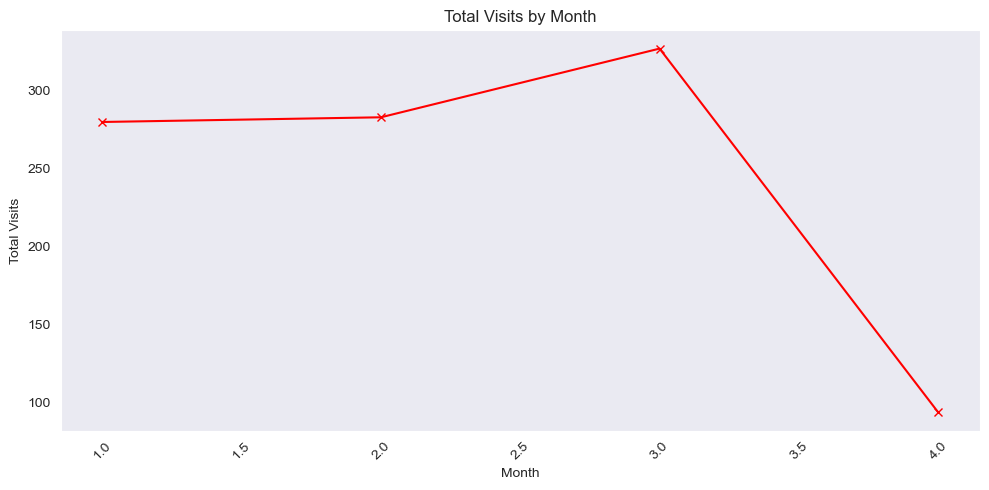

In [10]:
# group data by month to calc total visit
monthly_avg_visits = df.groupby('Month').size().reset_index(name="Visit_Count")

import matplotlib.pyplot as plt

# plot trend using a line chart
plt.figure(figsize=(10,5))
plt.plot(
    monthly_avg_visits['Month'],
    monthly_avg_visits['Visit_Count'],
    marker='x',
    linestyle='-',
    color='red'
)
# for color can use only red, green, blue
# existed linestyle  '-', '--', '-.', ':', 'None', ' ', '', 'solid', 'dashed', 'dashdot', 'dotted'
# existed marker, o and x

plt.xlabel("Month") # x label
plt.ylabel("Total Visits") # y label
plt.title("Total Visits by Month") # chart title
plt.xticks(rotation=45) # rotation label x
plt.grid(False)
plt.tight_layout()
plt.show()

**Reflection Question**
- What trends do you notice in the number of visits across different months?
    - The number of visits stays fairly steady in months 1 and 2, rises to a peak in month 3, and then drops sharply in month 4.
- Are there any months where visits peak or drop significantly? What factors might explain these patterns?
    - Visits peak in month 3 and fall drastically in month 4. This could be explained by seasonal demand, the effect of marketing campaigns, holidays, or other external events that influenced customer behavior.
- How could this trend information be useful for making business or planning decisions?
    - This trend can help businesses prepare by adjusting staffing, planning promotions during low months, and managing resources more effectively to match customer demand.

## 2️⃣ Visualising Comparisons

### (a) Bar chart
A **bar chart** is useful for comparing categorical data.  
We will check how **average spending differs** across different days of the week.  

✔ **X-axis** → Day of the Week  
✔ **Y-axis** → Average Price Paid  


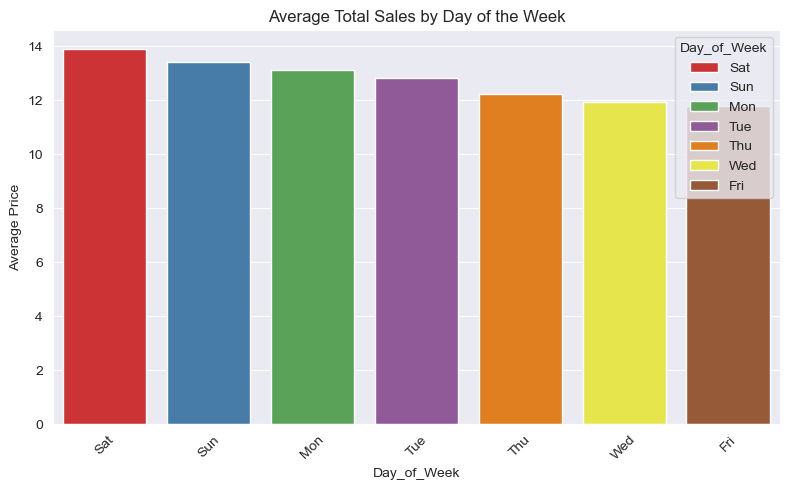

In [11]:
# group day of week to calc everage price
df_grouped = df.groupby('Day_of_Week')['Price'].mean().reset_index()

# sort result in desc order
df_grouped_sorted = df_grouped.sort_values(by='Price', ascending=False)

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))

sns.barplot(
    x='Day_of_Week',
    y='Price',
    data=df_grouped_sorted,
    hue="Day_of_Week",
    palette='Set1',
    legend=True
)

# https://seaborn.pydata.org/tutorial/color_palettes.html

plt.xlabel("Day_of_Week")
plt.ylabel("Average Price")
plt.title("Average Total Sales by Day of the Week")
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

**Reflection Question**
- Do customers tend to spend more on weekends compared to weekdays?
- What patterns can you spot from the differences in average spending?

### (b) Grouped Barchart
 A **grouped barchart** is used to compare more than one categorical variable on the same chart.

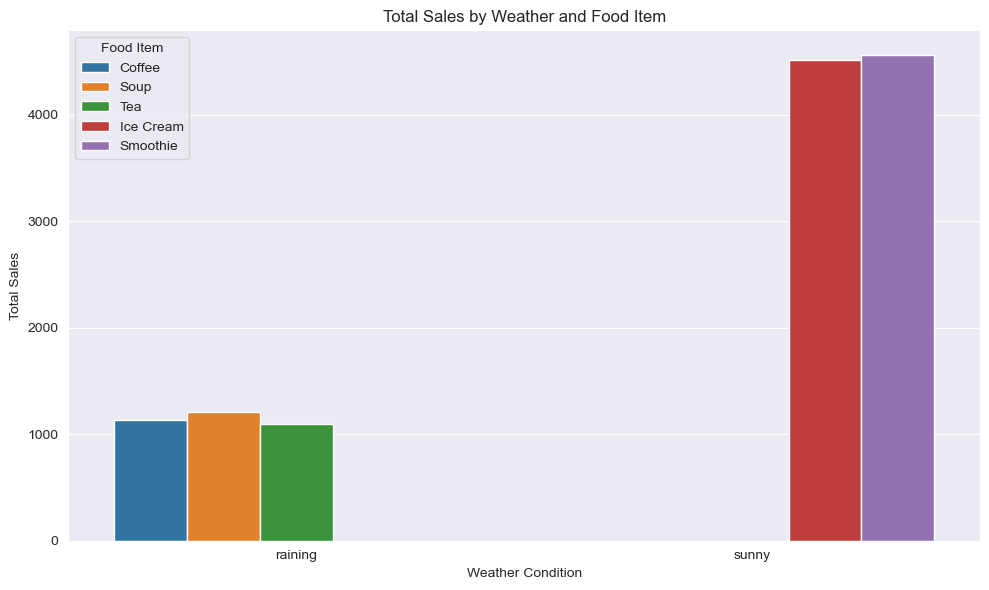

In [14]:
weather_item_sales = df.groupby(['Weather', 'Food_Item'])['Price'].sum().reset_index()

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.barplot(x='Weather', y ='Price', hue="Food_Item", data=weather_item_sales)

plt.xlabel("Weather Condition")
plt.ylabel("Total Sales")
plt.title("Total Sales by Weather and Food Item")
plt.legend(title="Food Item")
plt.tight_layout()

plt.show()

**Reflection Question**
How does the weather seem to influence the total sales of different food items?

Which food items perform better in certain weather conditions?

Are there any surprising patterns or trends when comparing food item sales across different weather conditions?

## 3️⃣ Visualising  distributions

A **histogram** helps us understand the distribution of a numerical variable.
In this example, we'll explore how prices are distributed across all transactions.

✔ X-axis → Price Paid
✔ Y-axis → Frequency (Number of Transactions)


**Reflection Question**
- Is there a common price range that most customers tend to pay?
- Are there any unexpected spikes or gaps in the price distribution?

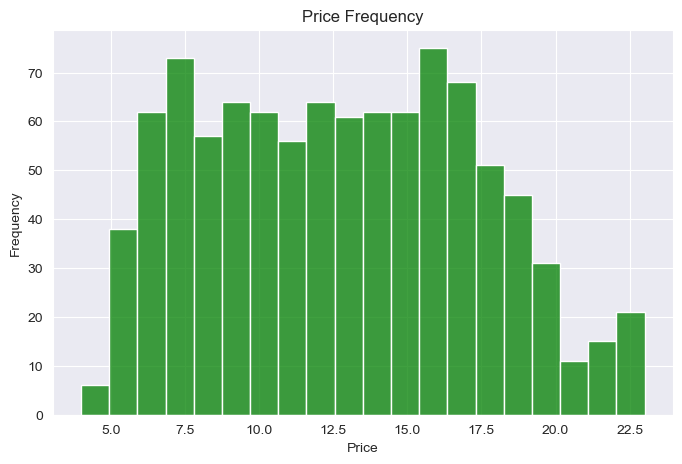

In [17]:
plt.figure(figsize=(8, 5))
sns.histplot(df['Price'], bins = 20, kde=False, color='blue')
# kde stand for connected line foe each bar

plt.xlabel("Price")
plt.ylabel("Frequency")
plt.title("Price Frequency")
plt.show()

## 4️⃣ Visualising compositions (parts of a whole)
A **pie chart** helps us see how different food items contribute to total sales.

In this example, we'll visualize the proportion of total sales by food item.
- Each slice → Food Item
- Size of slice → Percentage of Total Sales

**Reflection Questions:**
- Which food items contribute the most to total sales?
- Are there any items with surprisingly large or small shares?
- How might these proportions influence business or marketing decisions?

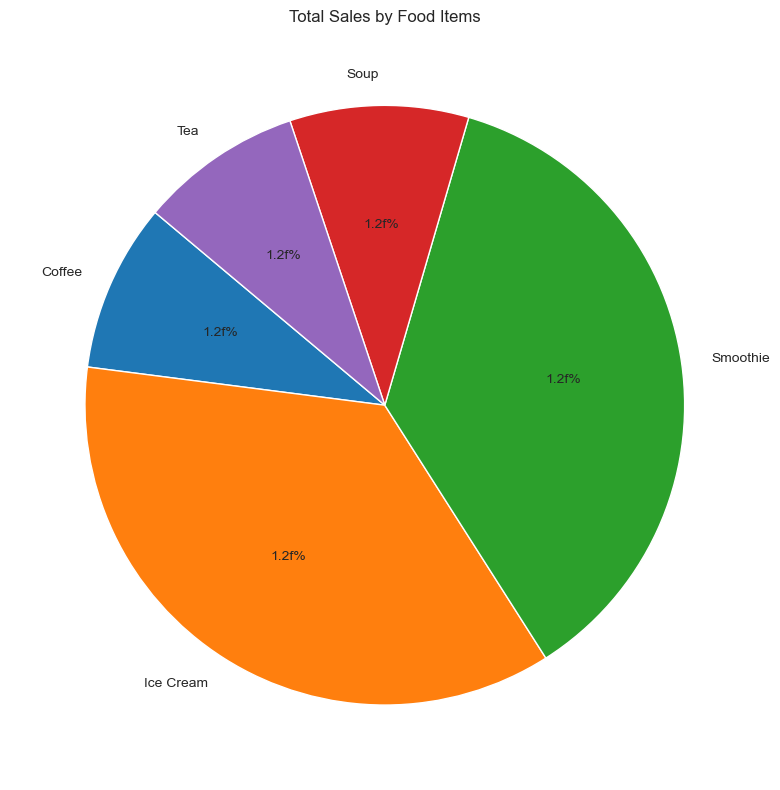

In [20]:
item_sales= df.groupby('Food_Item')['Price'].sum().reset_index()

plt.figure(figsize=(8, 8))
plt.pie(item_sales['Price'], labels=item_sales['Food_Item'],autopct ='1.2f%%', startangle=140)

plt.title("Total Sales by Food Items")
plt.tight_layout()

plt.show()